In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

import seaborn as sns
from matplotlib import style
style.use('default')

from sklearn.decomposition import NMF

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


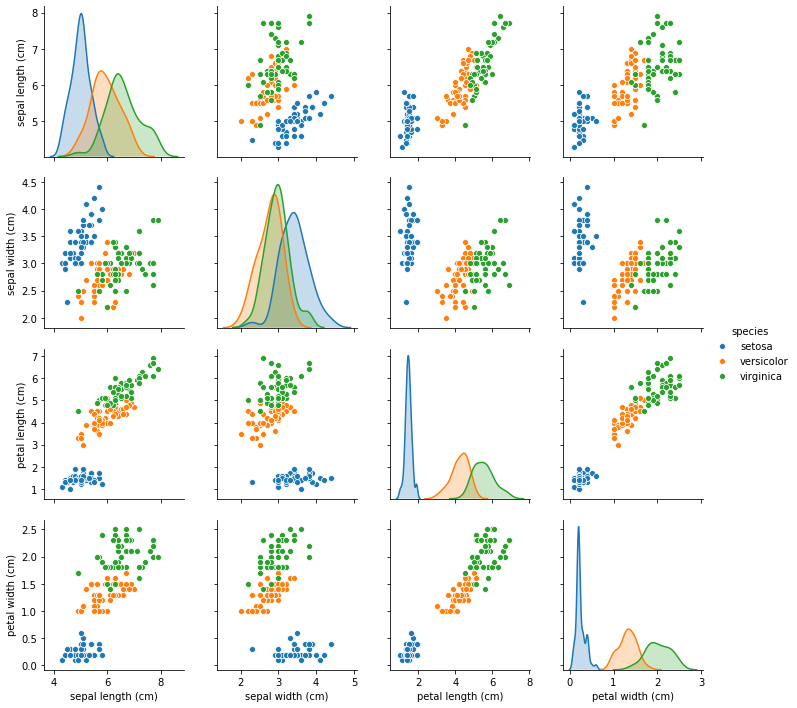

In [3]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target_names[iris.target]
sns.pairplot(df_iris, hue= 'species')
plt.show()

In [13]:
X = iris.data
Y = iris.target

In [14]:
?NMF

In [15]:
nmf = NMF(2)

In [16]:
nmf

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=2, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [17]:
nmf.n_components = 2
x = nmf.fit_transform(X)

In [20]:
np.shape(X), np.shape(x)

((150, 4), (150, 2))

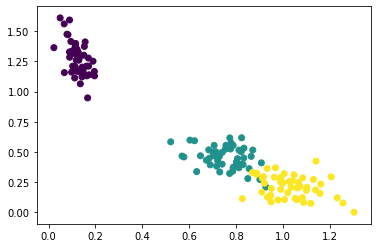

In [23]:
plt.scatter(x[:,0],x[:,1], c=Y)

In [25]:
h = nmf.components_

In [28]:
X - np.matmul(x, h)

array([[ 4.08664162e-03, -6.18857492e-03, -1.20510521e-03,
        -1.58305066e-03],
       [ 1.53603574e-01, -1.96266585e-01, -6.07763980e-02,
        -5.79595133e-02],
       [ 1.27636118e-02, -1.60512818e-02, -8.90070646e-03,
         5.53359779e-03],
       [-1.53501102e-02,  1.09500954e-02,  3.70293429e-02,
        -7.00143860e-02],
       [-7.55130162e-02,  9.35591641e-02,  3.64372371e-02,
         1.36692265e-02],
       [-1.26574034e-01,  1.66817320e-01,  2.49772659e-02,
         1.11302993e-01],
       [-1.32130391e-01,  1.71047537e-01,  3.84289893e-02,
         8.55726562e-02],
       [-5.66772710e-03,  1.53262769e-03,  2.13159510e-02,
        -4.41424778e-02],
       [ 2.02192121e-02, -3.14480231e-02,  1.18444759e-02,
        -5.61675704e-02],
       [ 9.39745705e-02, -1.33750605e-01,  1.48845142e-02,
        -1.63900260e-01],
       [ 4.01465600e-03, -7.88483999e-03,  5.60255911e-03,
        -1.82705696e-02],
       [-9.50217537e-02,  1.09001569e-01,  8.14793496e-02,
      

In [26]:
np.matmul(x, h)

array([[5.09591336, 3.50618857, 1.40120511, 0.20158305],
       [4.74639643, 3.19626659, 1.4607764 , 0.25795951],
       [4.68723639, 3.21605128, 1.30890071, 0.1944664 ],
       [4.61535011, 3.0890499 , 1.46297066, 0.27001439],
       [5.07551302, 3.50644084, 1.36356276, 0.18633077],
       [5.52657403, 3.73318268, 1.67502273, 0.28869701],
       [4.73213039, 3.22895246, 1.36157101, 0.21442734],
       [5.00566773, 3.39846737, 1.47868405, 0.24414248],
       [4.37978079, 2.93144802, 1.38815552, 0.25616757],
       [4.80602543, 3.2337506 , 1.48511549, 0.26390026],
       [5.39598534, 3.70788484, 1.49439744, 0.21827057],
       [4.89502175, 3.29099843, 1.51852065, 0.27144963],
       [4.67906109, 3.16458975, 1.40941242, 0.24048257],
       [4.30146972, 3.00195836, 1.08775338, 0.12731339],
       [5.7312249 , 4.07514283, 1.28033781, 0.09343299],
       [5.90387492, 4.1257594 , 1.48064663, 0.16918413],
       [5.45313662, 3.81030338, 1.36865871, 0.15674278],
       [5.09874603, 3.49377103,

In [29]:
df = pd.read_csv('./titanic/train.csv', index_col = 0)
df2 = pd.get_dummies(df.Sex, prefix='Sex')
df2['Pclass'] = df.Pclass
df2['SibSp'] = df.SibSp
df2['Parch'] = df.Parch
df2['Fare'] = df.Fare
df2 = pd.concat([df2, pd.get_dummies(df.Embarked,prefix='Embarked')], axis=1)

title = pd.Series([x.split(', ')[1].split('.')[0] for x in df.Name], index=df.index)
temp = title.value_counts()
tgt = temp[temp < 3].index.values

title[[x in tgt for x in title]] = 'Etc'
df2 = pd.concat([df2, pd.get_dummies(title, prefix='title')], axis=1)
df2

,Sex_female,Sex_male,Pclass,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title_Dr,title_Etc,title_Master,title_Miss,title_Mr,title_Mrs,title_Rev
PassengerId,,,,,,,,,,,,,,,,
1,0,1,3,1,0,7.2500,0,0,1,0,0,0,0,1,0,0
2,1,0,1,1,0,71.2833,1,0,0,0,0,0,0,0,1,0
3,1,0,3,0,0,7.9250,0,0,1,0,0,0,1,0,0,0
4,1,0,1,1,0,53.1000,0,0,1,0,0,0,0,0,1,0
5,0,1,3,0,0,8.0500,0,0,1,0,0,0,0,1,0,0
6,0,1,3,0,0,8.4583,0,1,0,0,0,0,0,1,0,0
7,0,1,1,0,0,51.8625,0,0,1,0,0,0,0,1,0,0
8,0,1,3,3,1,21.0750,0,0,1,0,0,1,0,0,0,0
9,1,0,3,0,2,11.1333,0,0,1,0,0,0,0,0,1,0


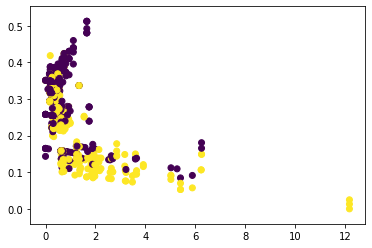

In [31]:
X = df2.values
Y = df.Survived

nmf.n_components = 2
x = nmf.fit_transform(X)

plt.scatter(x[:,0],x[:,1], c=Y)